# Find features for electrophysiological signature of conscientiousness

In [5]:
import os
import csv
from seegnature.feature_extraction import SeparabilityIndex
from seegnature.eeg_data import Container
import matplotlib.colors as mcolors

import pickle

Define helper method to read data from csv file into dictionary that has row numbers as keys and dictionaries as values. The dictionaries again has column names as keys and cell contents (that are identified by row number and column name) as values.

In [2]:
def read_csv_data(file):
    csv_data = {}
    f = open(file, 'r', encoding='utf-8')
    csv_file = csv.DictReader(f, delimiter='\t')

    n = 1
    for row in csv_file:
        csv_data[n] = {}
        for key in row.keys():
            csv_data[n][key] = row[key]
        n += 1
    f.close()
    return csv_data

Define helper method to create individual colormaps.

In [3]:
def make_colormap(seq):
    """Return a LinearSegmentedColormap
        seq: a sequence of floats and RGB-tuples. The floats should be increasing
        and in the interval (0,1).
        """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

Make individual colormap.

In [6]:
c = mcolors.ColorConverter().to_rgb
cmap = make_colormap([c('blue'), c('cyan'), 0.3, c('cyan'), c('white'), 0.45, c('white'), 0.55, c('white'), c('yellow'), 0.7, c('yellow'), c('red')])

Select channels that will be used during all following processing steps.

In [7]:
CHANNELS = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FCz', 'FC6', 'T7', 'C3', 'Cz', 'C4',
            'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']

Set working directory where all data folders are located. Every subfolder is considered as one dataset. A subfolder e.g. can stand for a single participant or a condition with eeg data from several participants.

In [8]:
working_directory = 'L:/int_err'

Select paths.

In [9]:
current_path = os.path.abspath(working_directory)
raw_data_path = os.path.abspath(os.path.join(current_path, 'raw_data'))
images_path = os.path.abspath(os.path.join(current_path, 'images'))
pickle_directory = os.path.abspath(os.path.join(current_path, 'pickles'))

In [10]:
eeg_data = Container(raw_data_path, 175)

Dataset ID: err_corr, record files: 45
Dataset ID: inv_corr, record files: 45
Dataset ID: stand_corr, record files: 45
Dataset ID: stand_err, record files: 37


In [11]:
group_coding_file = os.path.abspath(os.path.join(current_path, 'group_coding.txt'))
subject_ids_file = os.path.abspath(os.path.join(current_path, 'subject_ids.txt'))

subject_ids = read_csv_data(subject_ids_file)
subject_data = read_csv_data(group_coding_file)

In [12]:
eeg_data.merge_data(('Participant_ID', 'Subject_ID_EEG'), subject_ids, ['Subject_ID_Presentation'])
eeg_data.merge_data(('Subject_ID_Presentation', 'Subject_ID'), subject_data, ['Consc', 'Neuroticism', 'Extraversion', 'Consc_Group'])

Conscientiousness in correct STD responses:

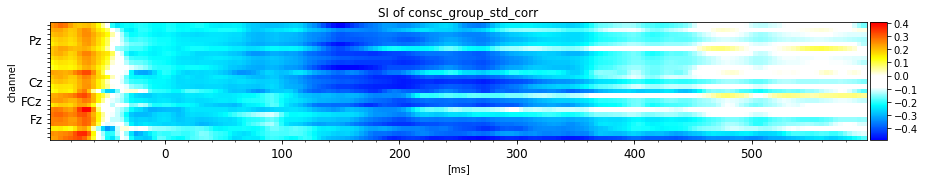

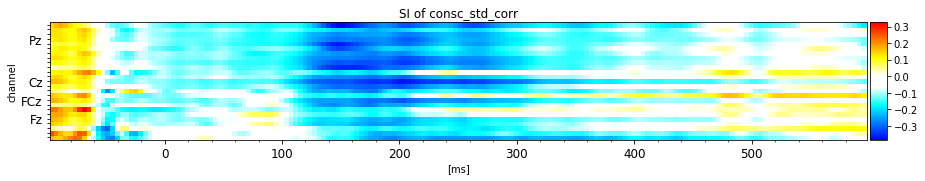

In [16]:
consc_group_std_corr = SeparabilityIndex('consc_group_std_corr', eeg_data.data['stand_corr'], CHANNELS, 'Consc_Group', 'pointbiserial')
consc_std_corr = SeparabilityIndex('consc_std_corr', eeg_data.data['stand_corr'], CHANNELS, 'Consc', 'pearson')

consc_group_std_corr.show_heatmap(cmap)
consc_std_corr.show_heatmap(cmap)

Conscientiousness in correct RV responses:

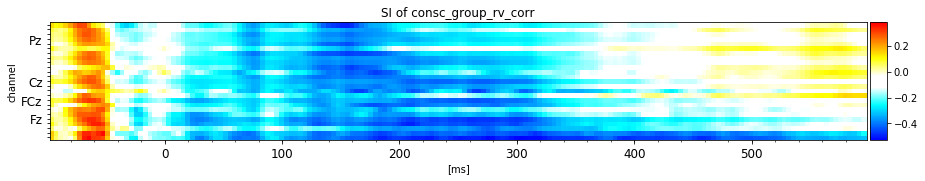

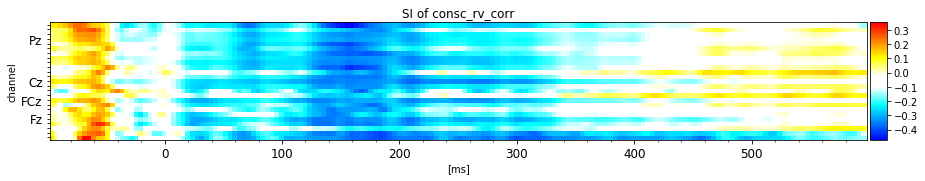

In [20]:
consc_group_rv_corr = SeparabilityIndex('consc_group_rv_corr', eeg_data.data['err_corr'], CHANNELS, 'Consc_Group', 'pointbiserial')
consc_group_rv_corr.pickle(pickle_directory)

consc_group_rv_corr.show_heatmap(cmap)

consc_rv_corr = SeparabilityIndex('consc_rv_corr', eeg_data.data['err_corr'], CHANNELS, 'Consc', 'pearson')
consc_rv_corr.pickle(pickle_directory)

consc_rv_corr.show_heatmap(cmap)

Conscientiousness in erroneous STD responses:

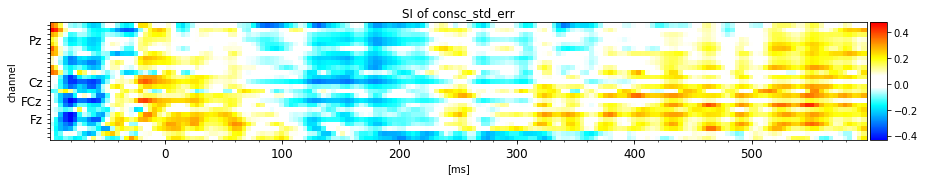

In [14]:
consc_std_err = SeparabilityIndex('consc_std_err', eeg_data.data['stand_err'], CHANNELS, 'Consc', 'pearson')

consc_std_err.show_heatmap(cmap)